In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/embedded_dataset.csv')
pd.set_option('display.max_rows', None)
df.head()

,customer_id,timestamp,action
0,0,2023-01-24 12:00:00,app_login
1,0,2023-01-24 12:05:00,app_login
2,0,2023-01-24 12:06:00,gold_loan_renew
3,0,2023-07-19 15:09:00,gold_loan_renew
4,0,2023-07-19 15:20:00,gold_loan_renew


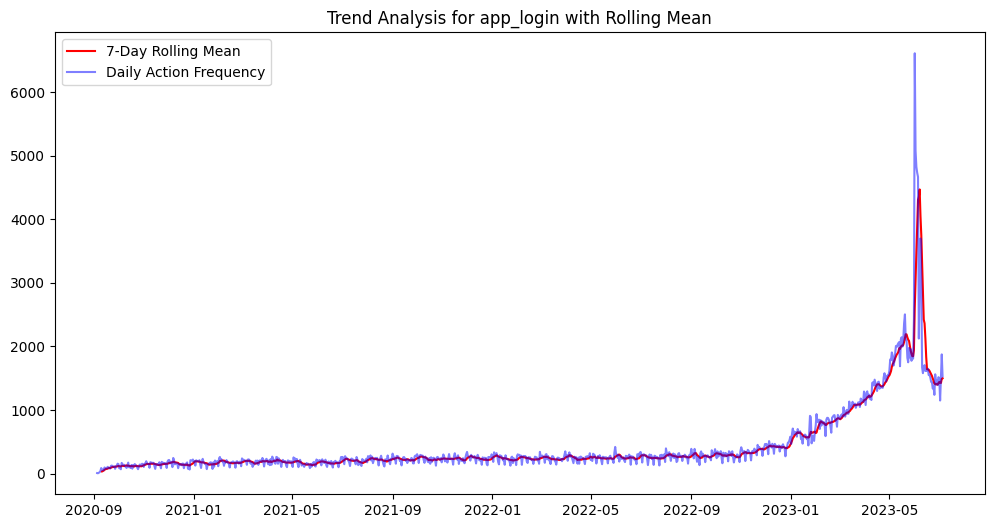

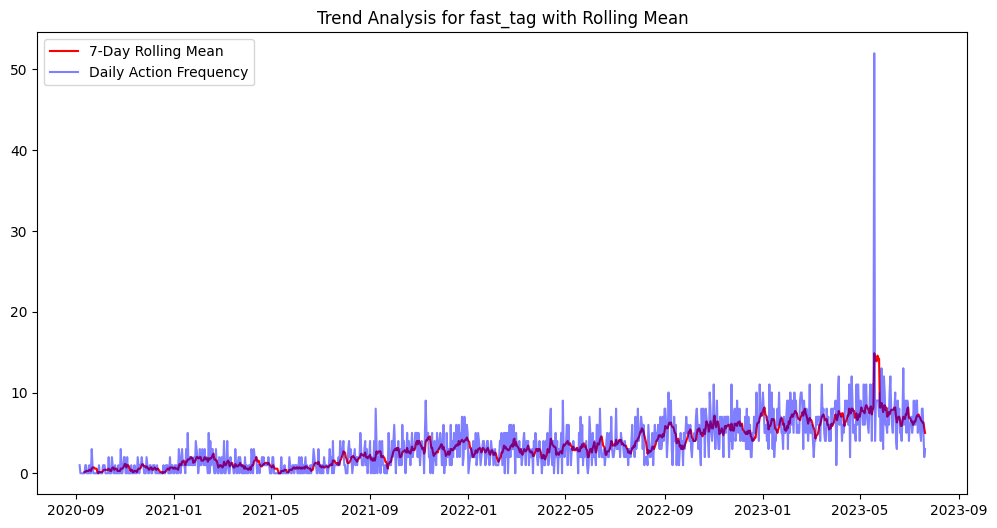

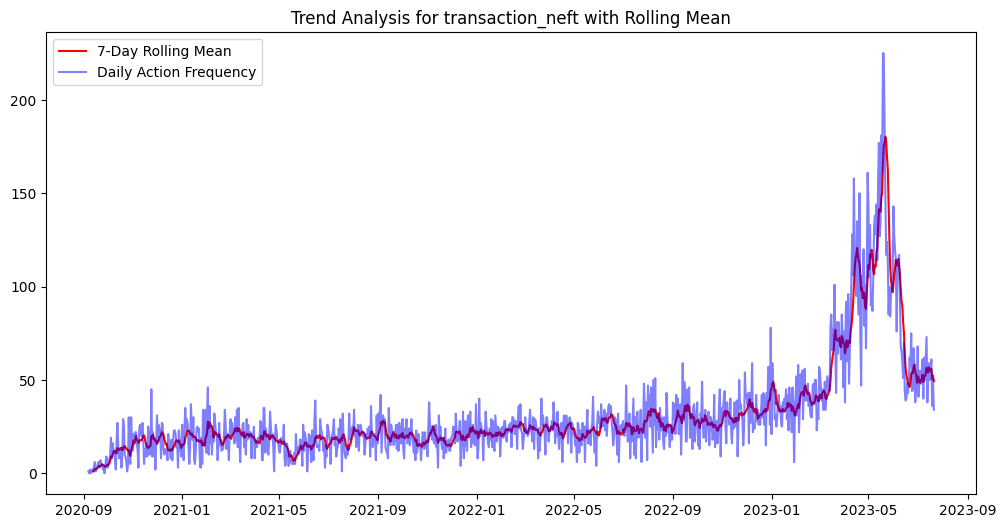

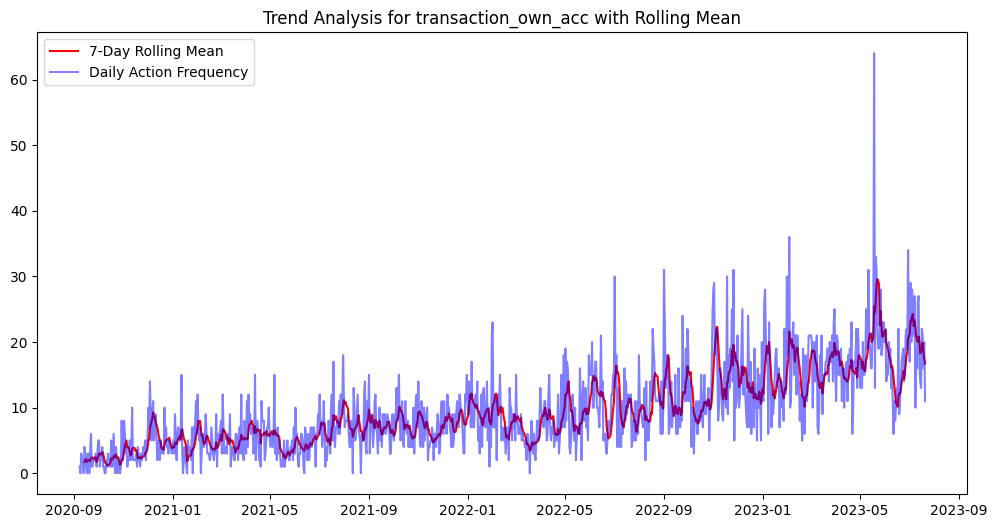

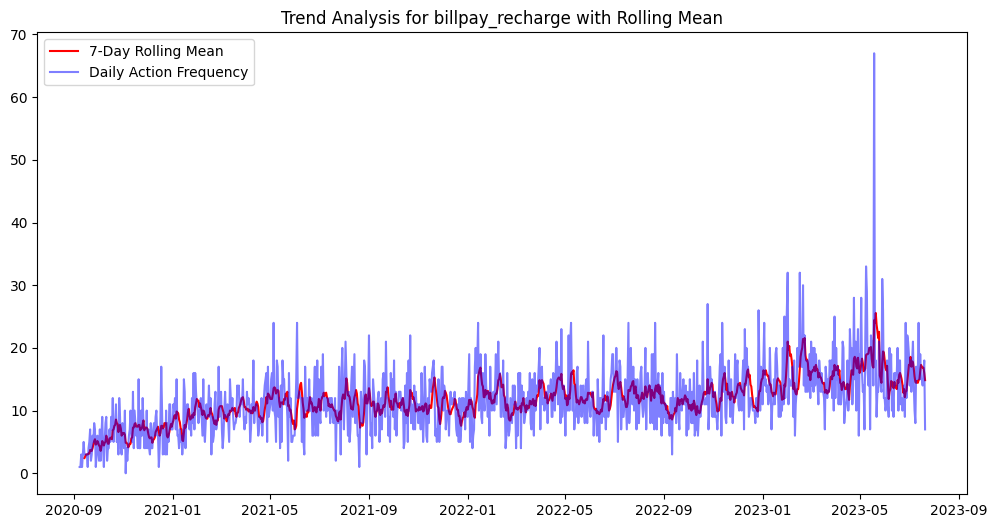

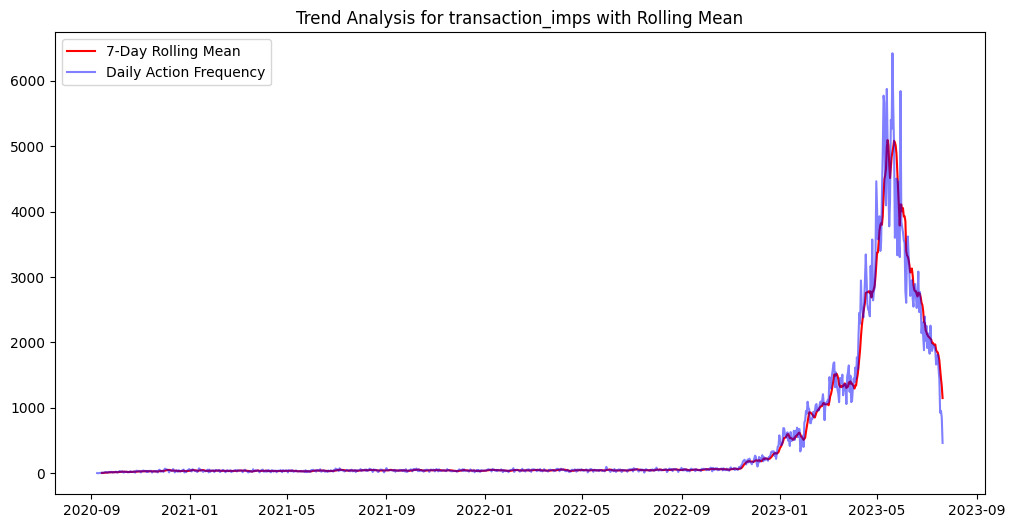

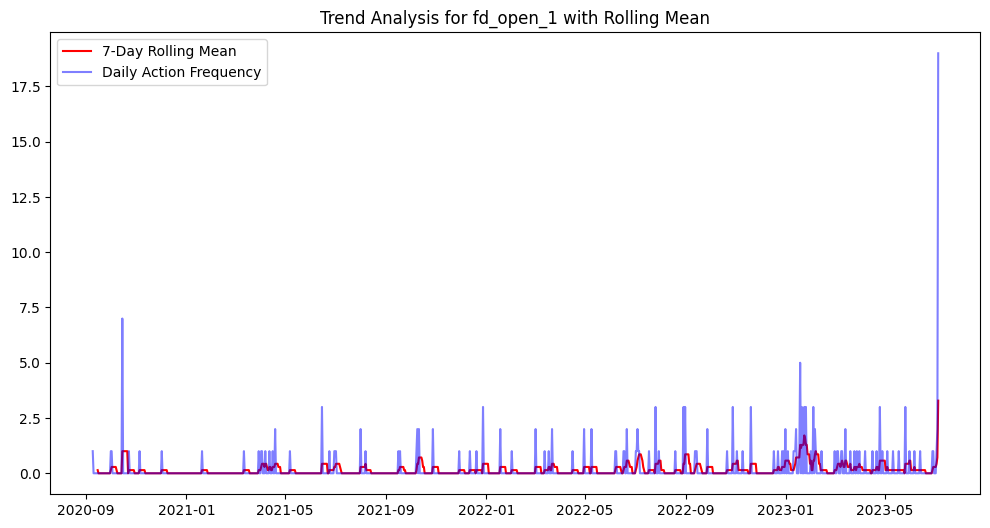

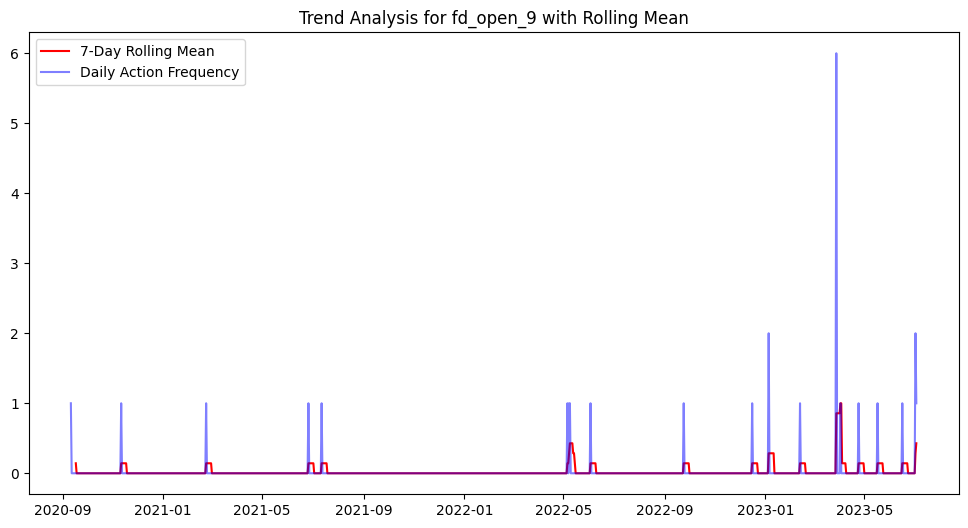

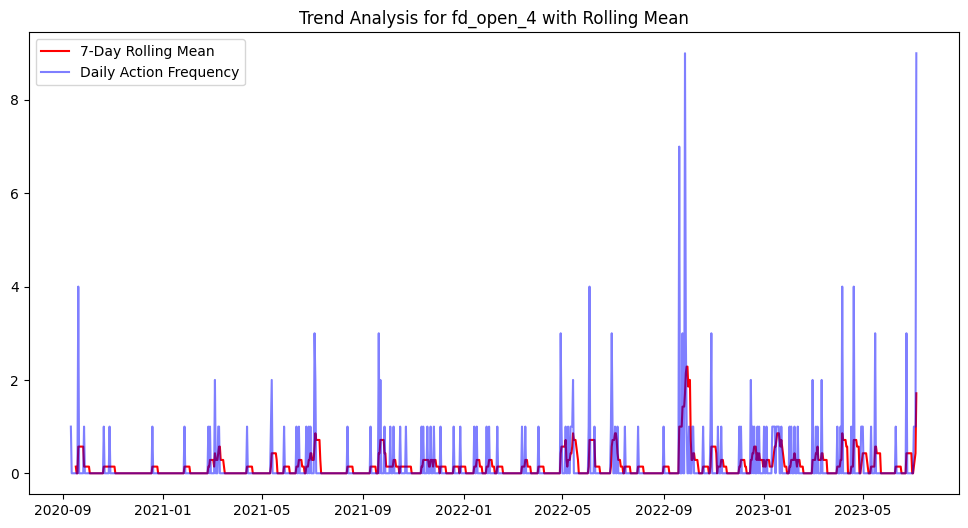

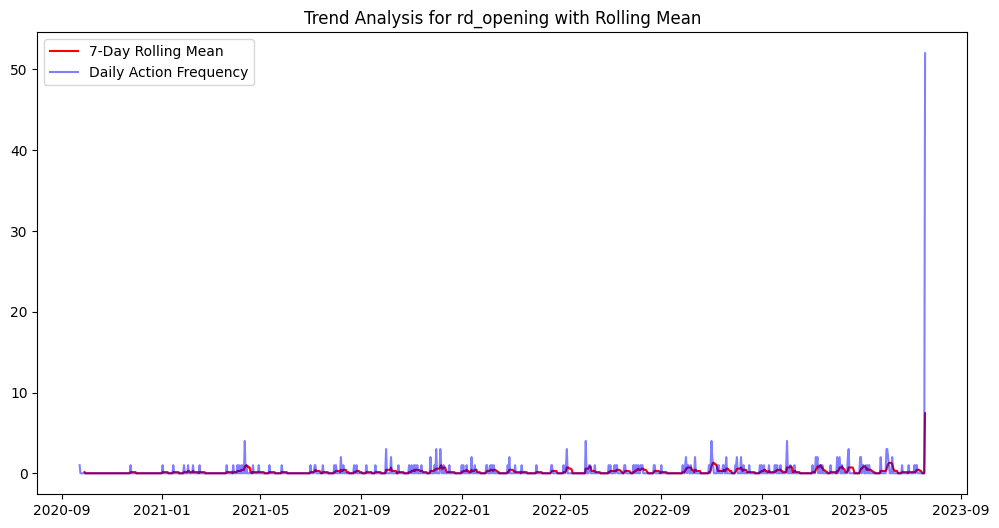

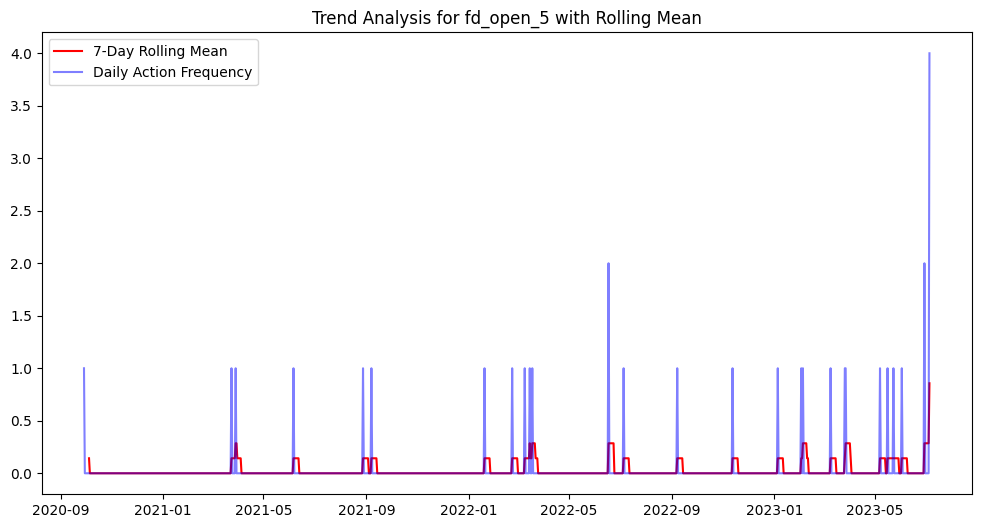

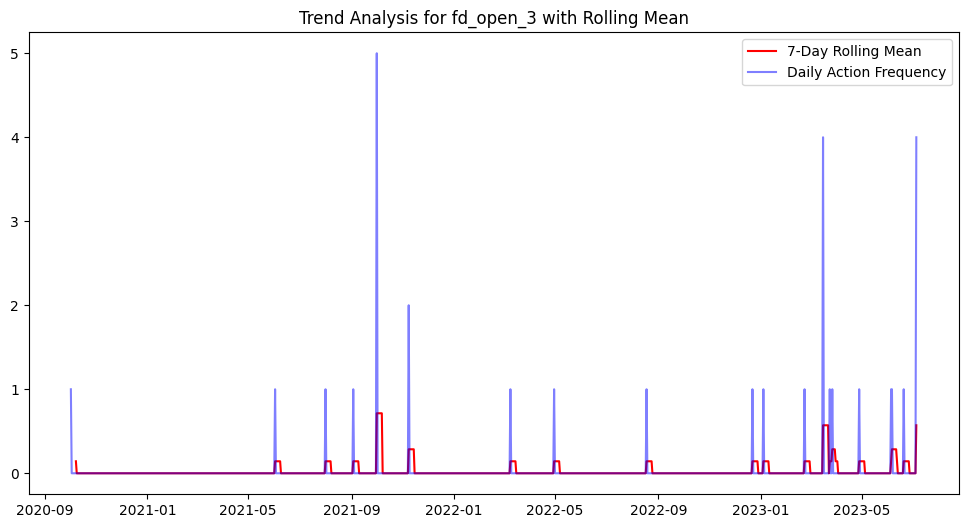

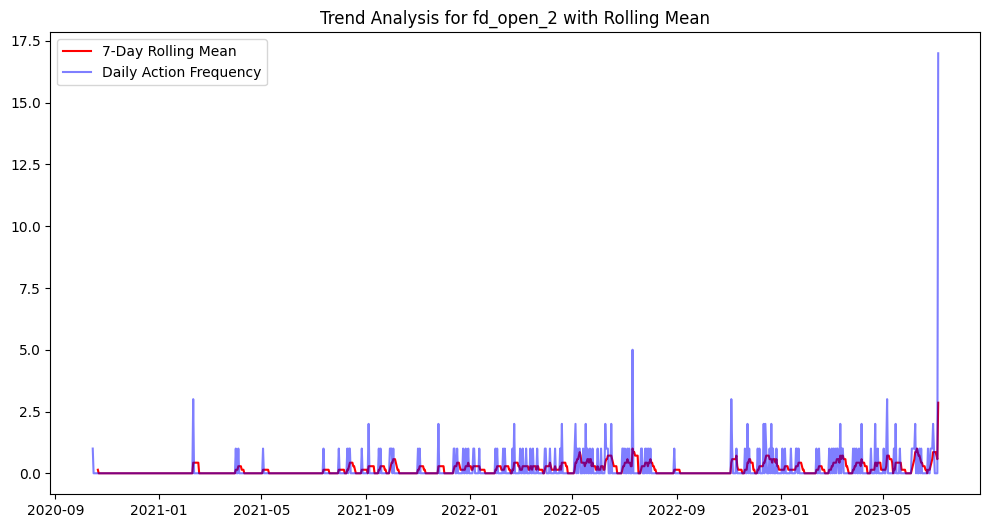

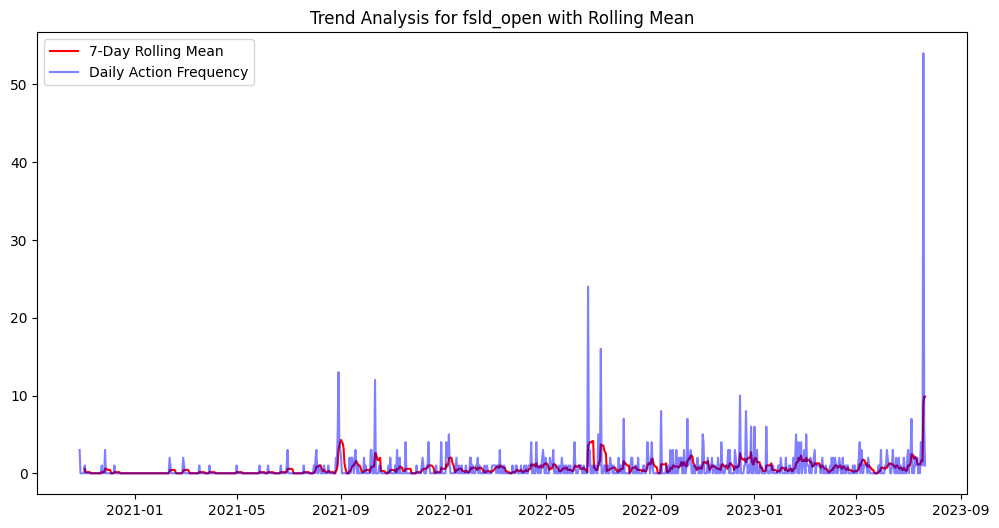

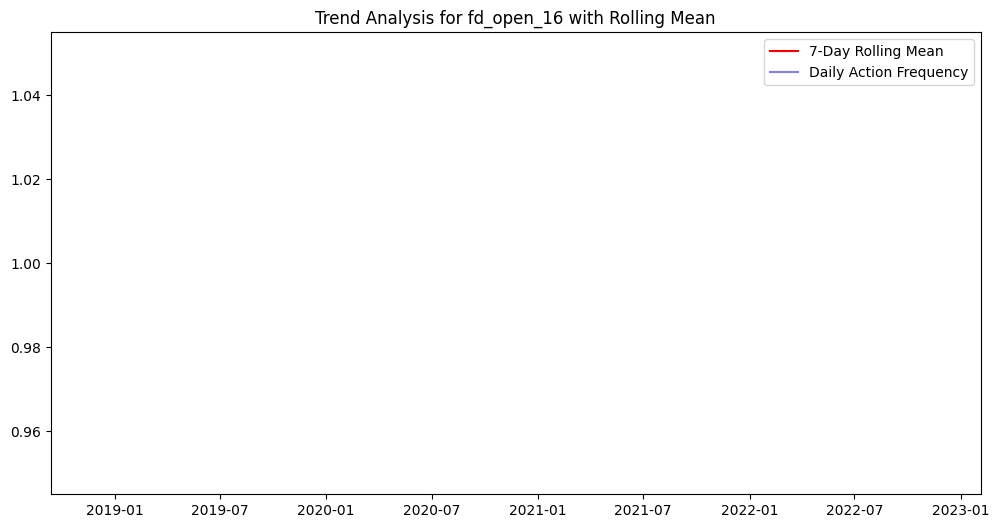

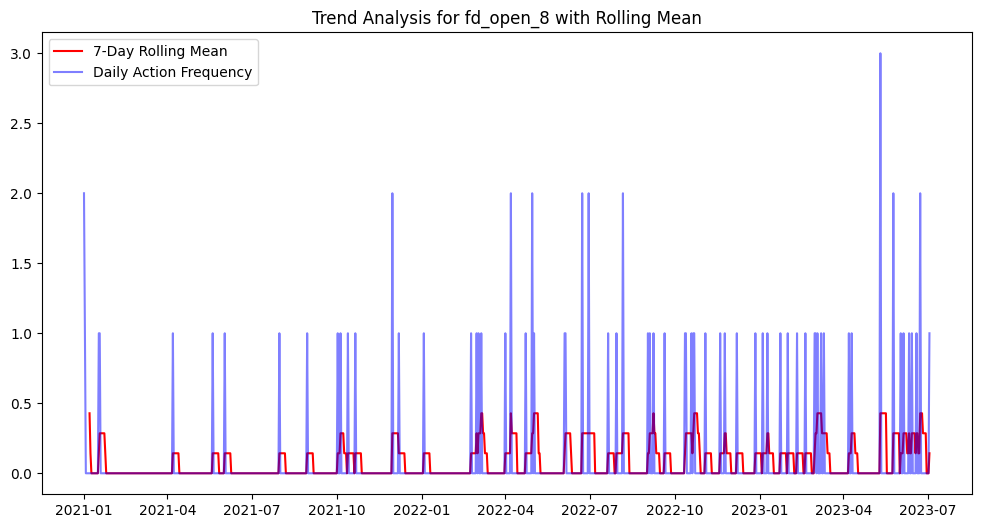

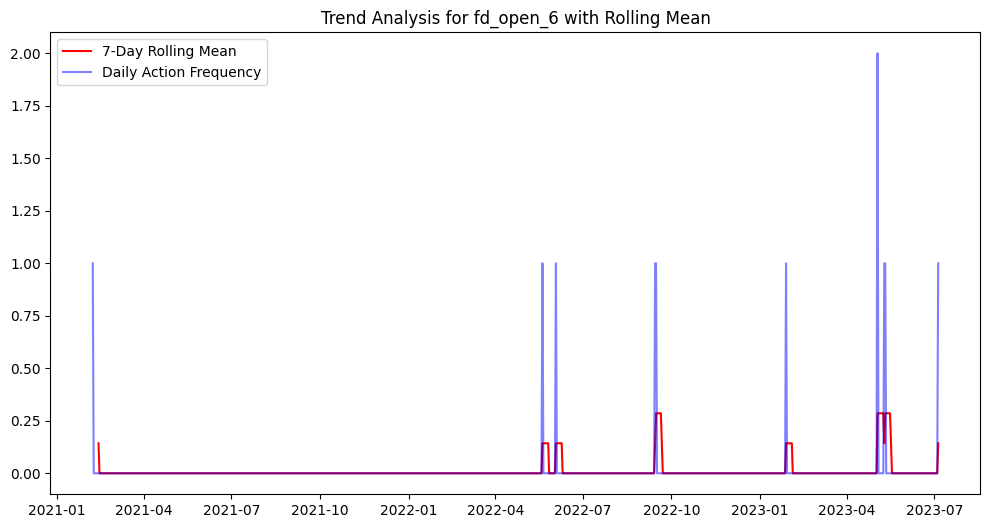

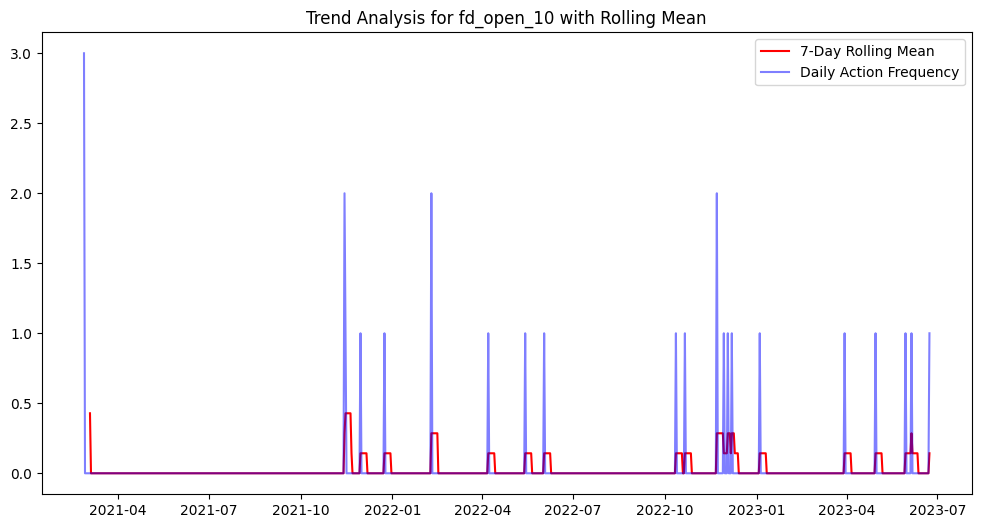

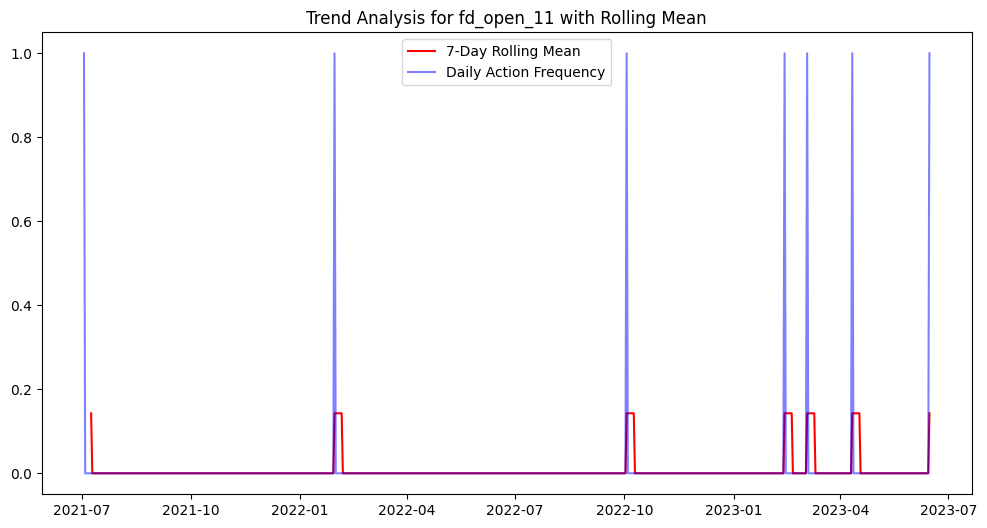

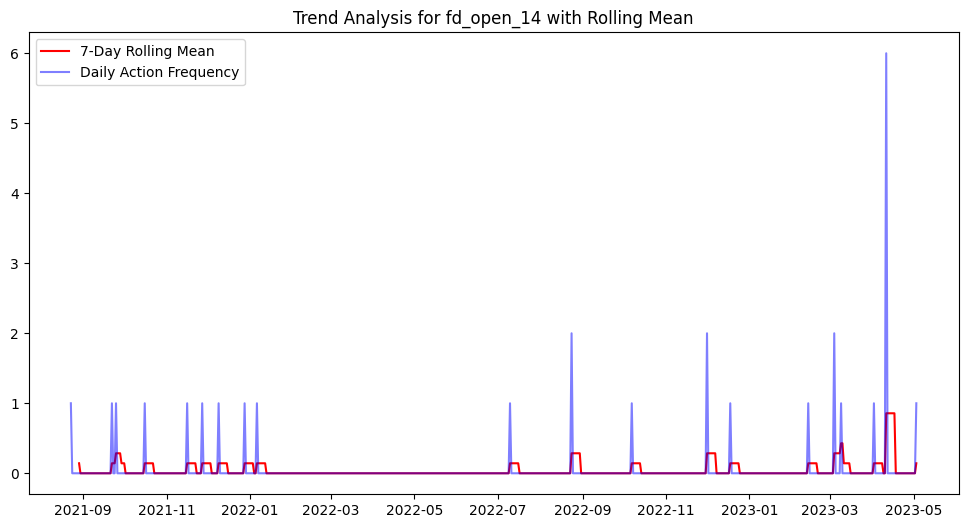

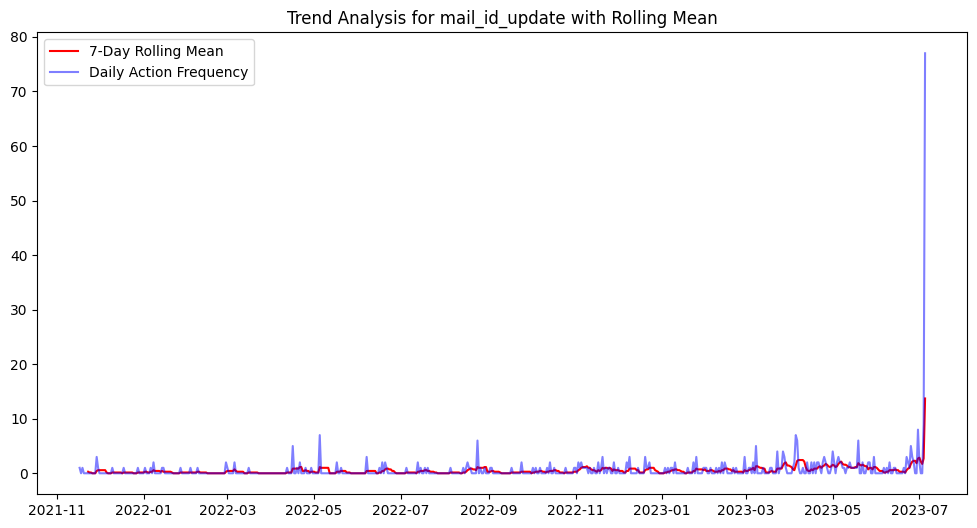

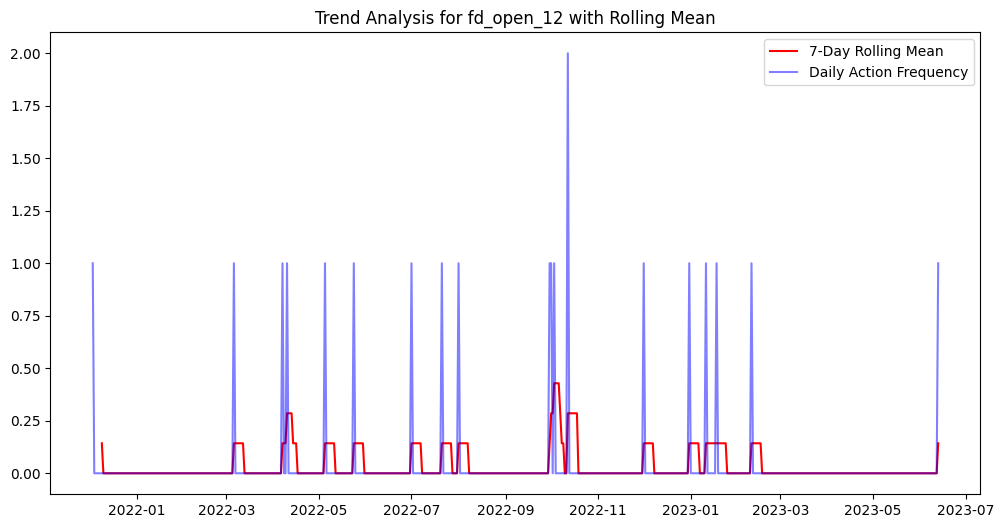

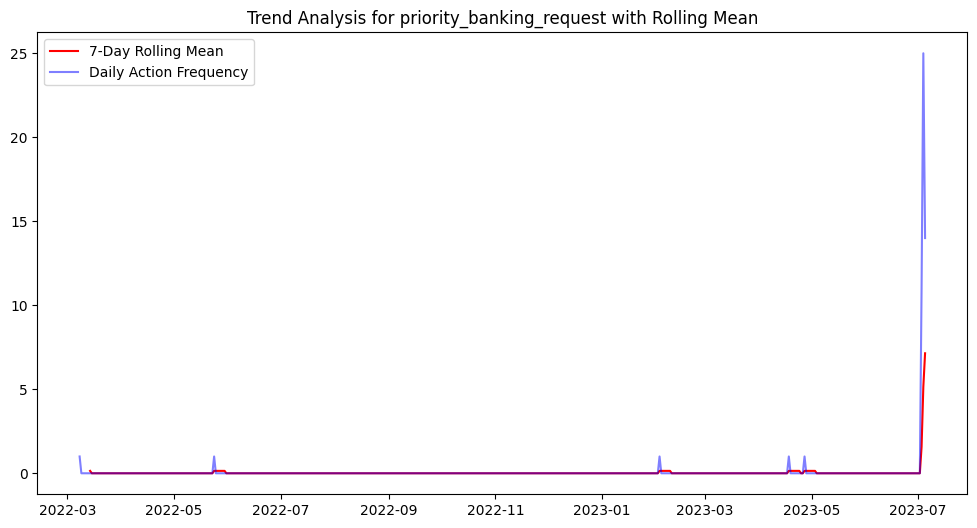

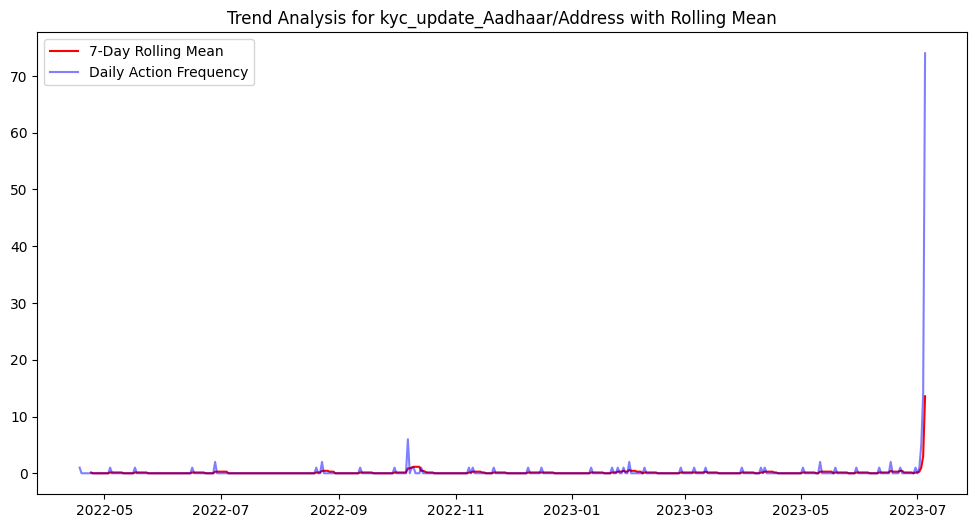

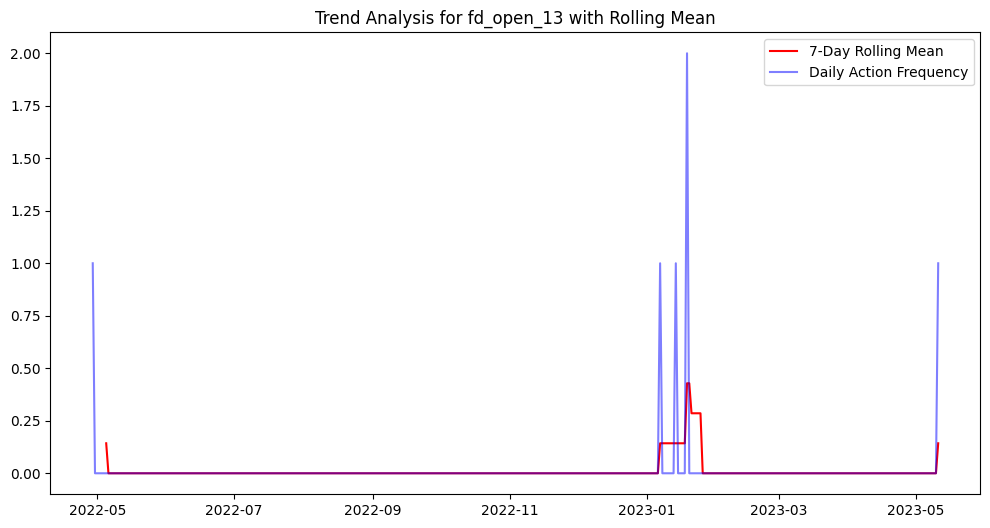

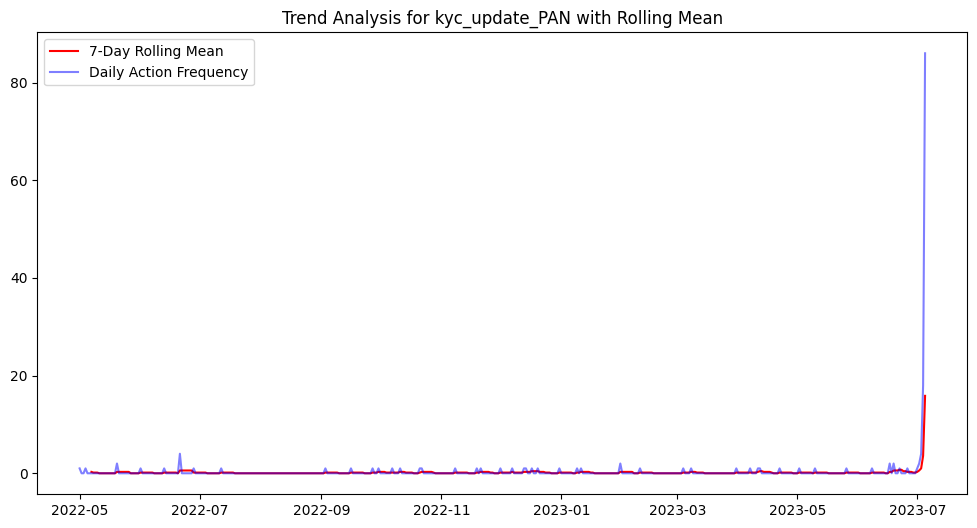

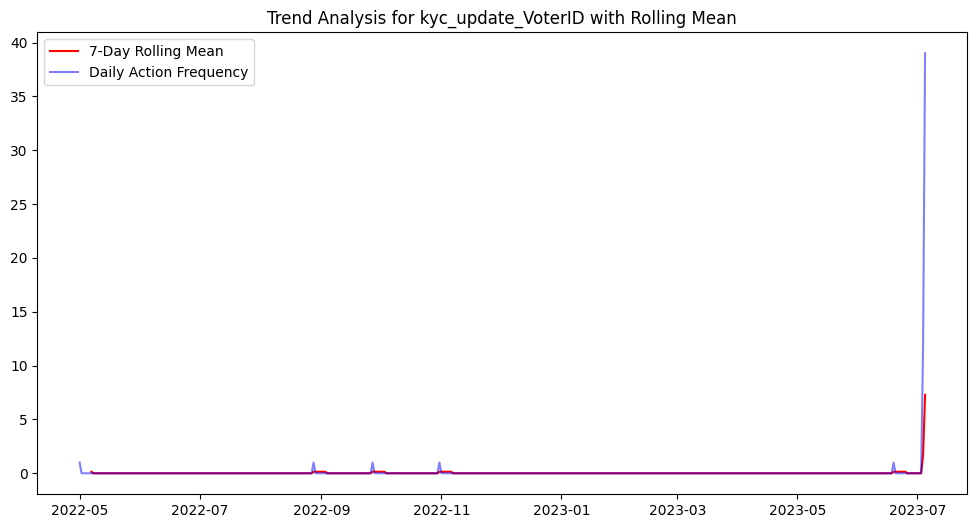

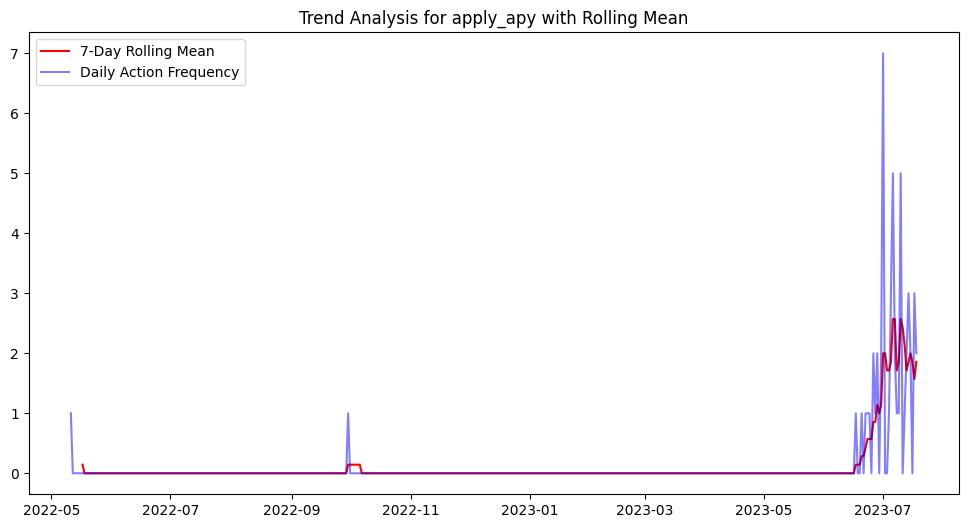

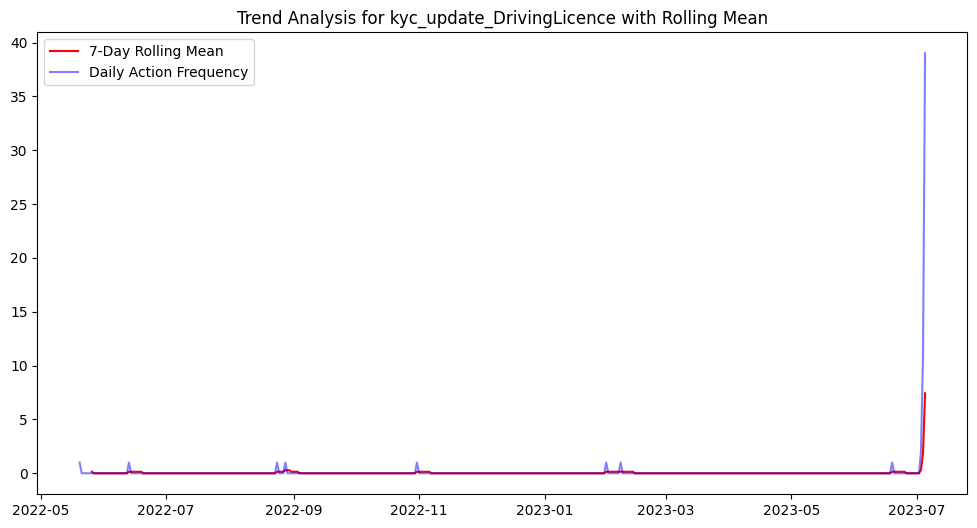

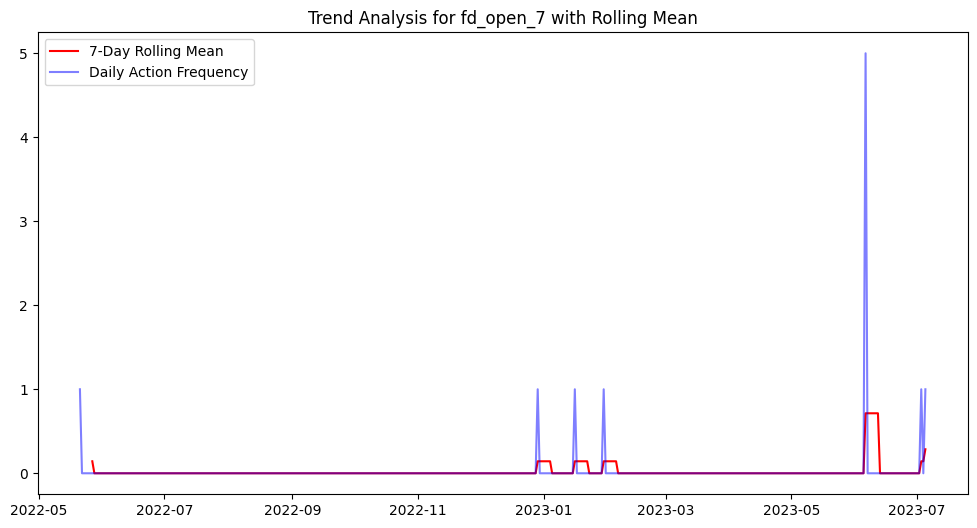

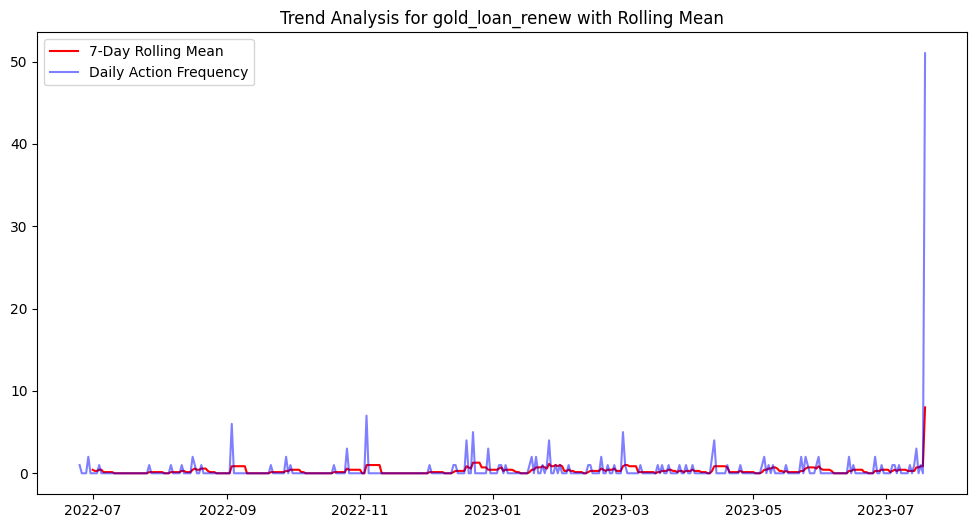

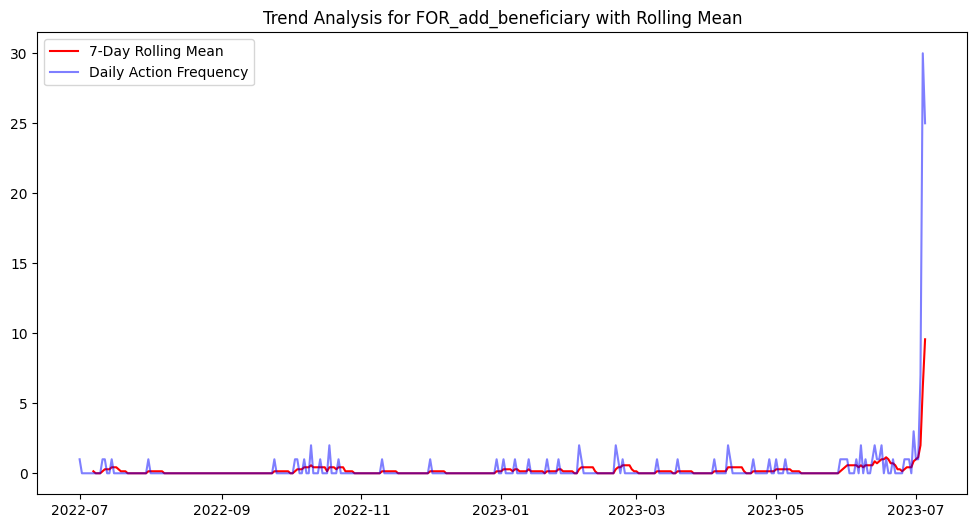

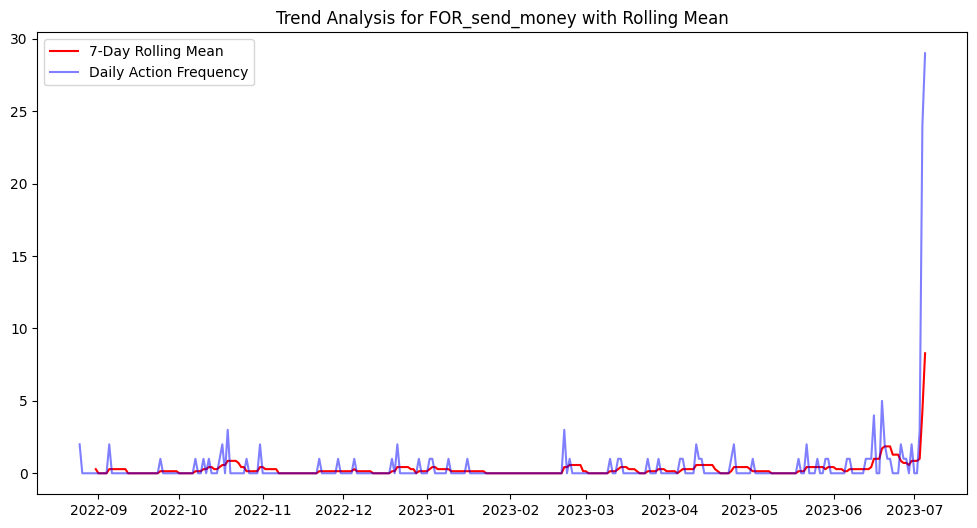

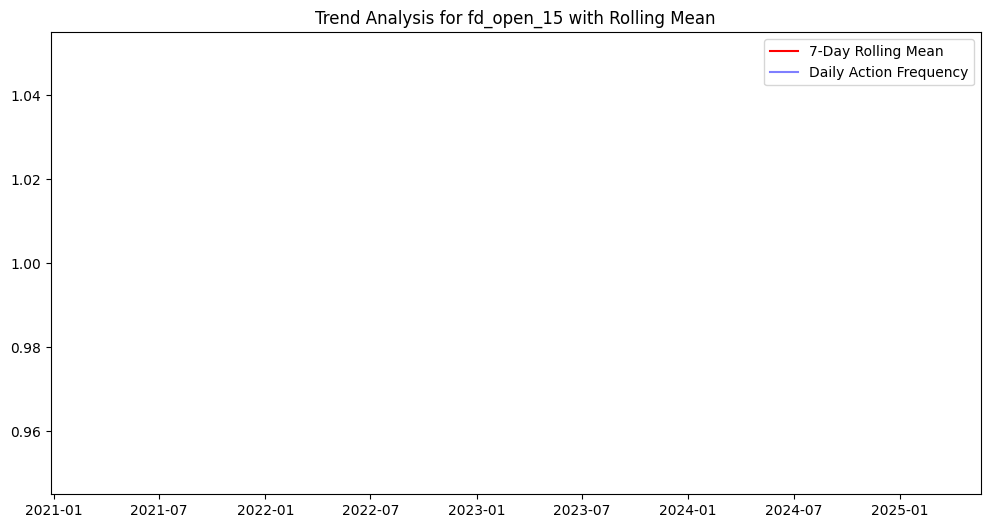

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import random

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by timestamps
df.sort_values('timestamp', inplace=True)

# List of unique action labels
unique_labels = df['action'].unique()


for label in unique_labels:

    label_data = df[df['action'] == label]

    # Trend Analysis with Rolling Mean
    rolling_mean = label_data.set_index('timestamp').resample('D').size().rolling(window=7).mean()  # 7-day rolling mean
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
    ax.plot(label_data.set_index('timestamp').resample('D').size(), label='Daily Action Frequency', color='blue', alpha=0.5)
    ax.set_title(f'Trend Analysis for {label} with Rolling Mean')
    ax.legend()
    plt.show()

    # Identify Spikes
    spike_threshold = 1.5  
    spikes_mask = label_data.set_index('timestamp').resample('D').size() > spike_threshold * rolling_mean.mean()
    spikes = label_data.loc[spikes_mask.index.intersection(label_data.index)]  # Filter label_data based on spikes
    if not spikes.empty:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(label_data.set_index('timestamp').resample('D').size(), label='Daily Action Frequency', color='blue', alpha=0.5)
        ax.scatter(spikes.index, spikes.set_index('timestamp').resample('D').size(), color='red', label='Spikes')
        ax.set_title(f'Identification of Spikes for {label}')
        ax.legend()
        plt.show()

    # # Seasonal Pattern of Actions
    # fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    # label_data.set_index('timestamp').resample('D').size().plot(ax=axes[0], title=f'Daily Action Frequency for {label}')
    # label_data.set_index('timestamp').resample('W').size().plot(ax=axes[1], title=f'Weekly Action Frequency for {label}')
    # plt.show()


In [46]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

month1 = '01'
year1 = '2020'
month2 = '12'
year2 = '2020'

start_date = pd.to_datetime(f'{month1}/{year1}', format='%m/%Y')
end_date = pd.to_datetime(f'{month2}/{year2}', format='%m/%Y')
df_filtered = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

In [47]:
num_actions = df_filtered.shape[0]
print(num_actions)

14072
